In [6]:
pip install onnxruntime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
# Загрузка модели ONNX
import onnxruntime
session = onnxruntime.InferenceSession('cifar100.onnx')

In [8]:
import cv2
import numpy as np
from PIL import Image
from glob import glob
from google.colab import drive
import pandas as pd

# Подключение к Google Диску
drive.mount('/content/drive')

data = []
heigth_width = 32
images = []

path_class_1 = "/content/drive/MyDrive/Капибара/*.*"
for photo in glob(path_class_1):
    img = Image.open(photo).convert('RGB')
    img = img.resize((heigth_width, heigth_width), Image.ANTIALIAS)
    images.append(np.asarray(img))
path_class_1 = "/content/drive/MyDrive/Кенгуру/*.*"
for photo in glob(path_class_1):
    img = Image.open(photo).convert('RGB')
    img = img.resize((heigth_width, heigth_width), Image.ANTIALIAS)
    images.append(np.asarray(img))
path_class_1 = "/content/drive/MyDrive/Медведь/*.*"
for photo in glob(path_class_1):
    img = Image.open(photo).convert('RGB')
    img = img.resize((heigth_width, heigth_width), Image.ANTIALIAS)
    images.append(np.asarray(img))

train = np.array(images)

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:819: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


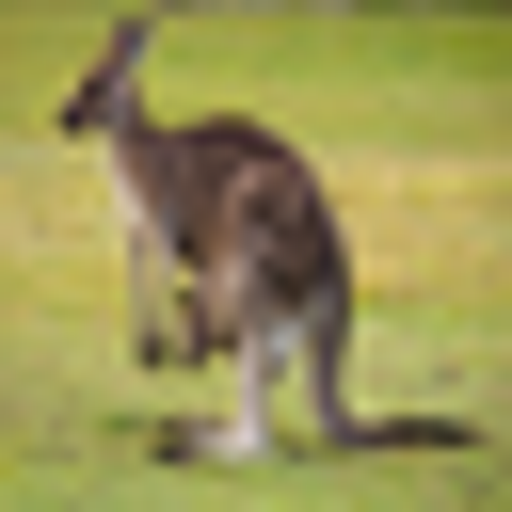

In [9]:
Image.fromarray(train[133]).resize((512,512))

In [10]:
# Подготовка входных данных
input_name = session.get_inputs()[0].name
input_shape = session.get_inputs()[0].shape
input_type = session.get_inputs()[0].type
input_data = np.array(images, dtype=np.float32)

In [11]:
input_data.shape

(300, 32, 32, 3)

In [12]:
import time
import psutil

# Замер времени выполнения
start_time = time.time()

# Выполнение предсказания
output_name = session.get_outputs()[0].name
output_shape = session.get_outputs()[0].shape
output_type = session.get_outputs()[0].type
output_data = session.run([output_name], {input_name: input_data})[0]

# Замер времени выполнения
end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time: ", elapsed_time)

# Замер использования памяти
process = psutil.Process()
memory_usage = process.memory_info().rss / 1024 / 1024
print("Memory usage: ", memory_usage, "MB")

Elapsed time:  0.6020715236663818
Memory usage:  274.87109375 MB
